<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [34]:
#show descriptive statistics for all median home values in the df
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')

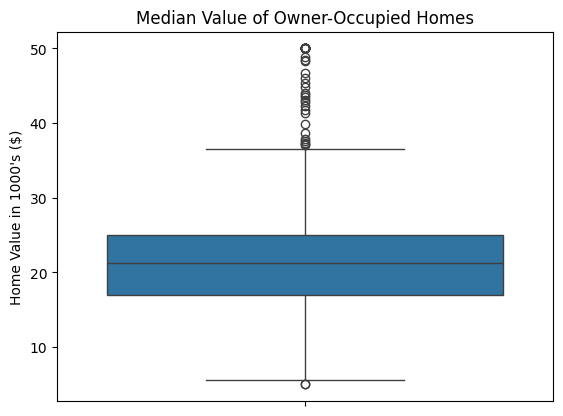

In [36]:
#Make the boxplot to show median value of all owner occupied homes in the df
sns.boxplot(y=boston_df['MEDV'], data=boston_df)
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Median Value of Owner-Occupied Homes')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**Part 1**

**Question:** Is there a significant difference in median value of houses bounded by the Charles river or not?

Text(0.5, 1.0, 'Comparing Value of Owner-Occupied Homes Bounded by the Charles River or Not')

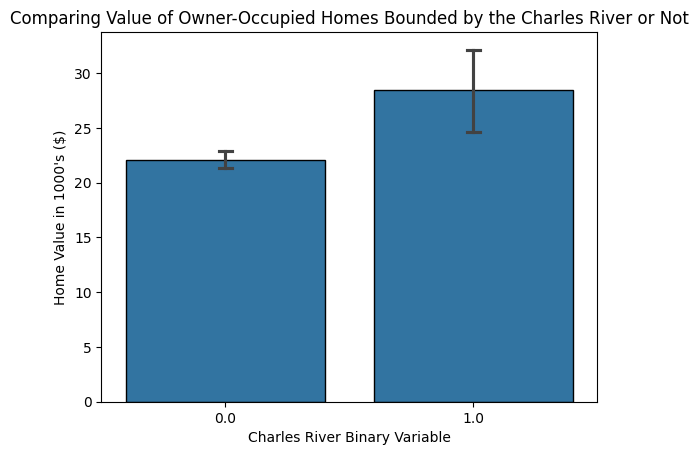

In [22]:
#Make the barplot to compare mean price of homes bounded by the Charles river or not
sns.barplot(x=boston_df['CHAS'], y=boston_df['MEDV'], data=boston_df, edgecolor='black', capsize=0.05)
pyplot.xlabel('Charles River Binary Variable')
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Comparing Value of Owner-Occupied Homes Bounded by the Charles River or Not')

In [23]:
#create data frame for houses bound by the Charles
df_chas1 = boston_df[boston_df['CHAS'] == 1]

#create data frame for houses not bound by the Charles
df_chas0 = boston_df[boston_df['CHAS'] == 0]

In [30]:
#descriptive stats for houses not bound by the Charles
df_chas0['MEDV'].describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [32]:
#descriptive stats for houses bound by the Charles
df_chas1['MEDV'].describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [35]:
#Conduct Levene's test to check for equal variance between the 2 groups
scipy.stats.levene(df_chas0['MEDV'], df_chas1['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [38]:
#Conduct t-test to compare the home values in the 2 groups (do not assume equal variance)
scipy.stats.ttest_ind(df_chas0['MEDV'], df_chas1['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Statistical Test:** T-test for independent samples (2-tailed, unequal variances)

**Null Hypothesis:** There is not a significant difference between the median of owner-occupied homes bounded by the Charles River or not.

**Statistical Result:** The p-value of 0.00357 for a 2-tailed t-test suggests that we can reject the null hypothesis.

**Conclusion:** There is a significant difference in median value of houses bounded by the Charles River or not.

**Part 2**

**Question:** Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [14]:
#Add AGE_GROUP category to the data frame 
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '0-35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = '36-69'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_GROUP'] = '70+'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,36-69
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70+
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,36-69
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,36-69
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,36-69


Text(0.5, 1.0, 'Comparing Value of Owner-Occupied Homes Based on Age Group')

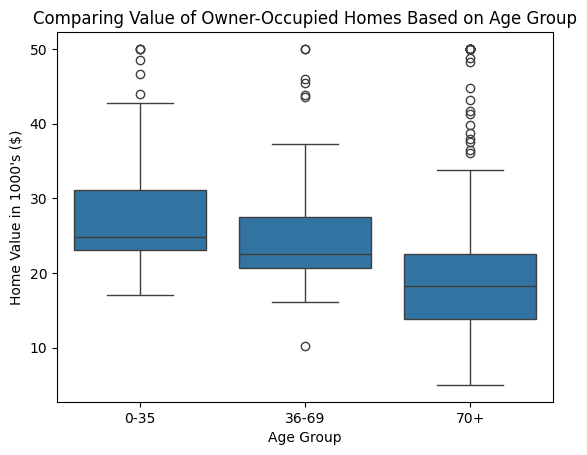

In [24]:
#Make the boxplot to compare home price based on the AGE_GROUP category
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'], data=boston_df, 
           order=['0-35', '36-69', '70+'])
pyplot.xlabel('Age Group')
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Comparing Value of Owner-Occupied Homes Based on Age Group')

In [25]:
#create data frames with data for the 3 age groups
df_age1 = boston_df[boston_df['AGE_GROUP'] == '0-35']
df_age2 = boston_df[boston_df['AGE_GROUP'] == '36-69']
df_age3 = boston_df[boston_df['AGE_GROUP'] == '70+']

In [26]:
#descriptive stats for home values in first age group
df_age1['MEDV'].describe()

count    91.000000
mean     27.775824
std       7.638198
min      17.100000
25%      23.050000
50%      24.800000
75%      31.150000
max      50.000000
Name: MEDV, dtype: float64

In [27]:
#descriptive stats for home values in second age group
df_age2['MEDV'].describe()

count    128.000000
mean      24.947656
std        6.969370
min       10.200000
25%       20.675000
50%       22.600000
75%       27.425000
max       50.000000
Name: MEDV, dtype: float64

In [28]:
#descriptive stats for home values in third age group
df_age3['MEDV'].describe()

count    287.000000
mean      19.793380
std        9.515375
min        5.000000
25%       13.800000
50%       18.200000
75%       22.550000
max       50.000000
Name: MEDV, dtype: float64

In [29]:
#Conduct ANOVA to compare the home values in the 3 groups
F_stat, p_value = scipy.stats.f_oneway(df_age1['MEDV'], df_age2['MEDV'], df_age3['MEDV'])
print('F-statistic from ANOVA analysis is', F_stat)
print('p-value from ANOVA analysis is', p_value)

F-statistic from ANOVA analysis is 36.40764999196599
p-value from ANOVA analysis is 1.7105011022702984e-15


**Statistical Test:** ANOVA for independent samples 

**Null Hypothesis:** There is not a significant difference between the median of owner-occupied homes in the 3 age group categories.

**Statistical Result:** The p-value of 1.711e-15 from the ANOVA suggests that we can reject the null hypothesis.

**Conclusion:** There is a significant difference in the median value of houses for at least 1 of the age categories.

**Part 3**

**Question:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Text(0.5, 1.0, 'Relationship between NOX and Non-Retail Business Acres')

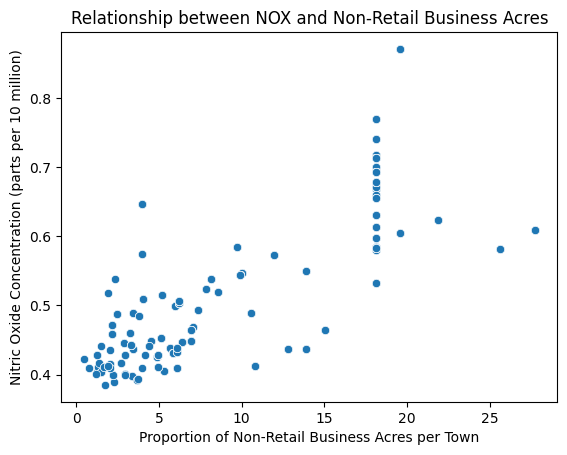

In [31]:
#Make the scatter plot to compare INDUS and NOX columns
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], data=boston_df)
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town')
pyplot.ylabel('Nitric Oxide Concentration (parts per 10 million)')
pyplot.title('Relationship between NOX and Non-Retail Business Acres')

In [33]:
#Conduct Pearson correlation test
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Statistical Test:** Pearson Correlation

**Null Hypothesis:** There is not a significant correlation between the Nitric Oxide concentration and proportion of non-retail business acres per town.

**Statistical Result:** The p-value of 7.913e-98 from the Pearson correlation suggests that we can reject the null hypothesis. The R value of 0.764 suggests a strong positive correlation.

**Conclusion:** There is a significant positive correlation between the Nitric Oxide concentration and proportion of non-retail business acres per town.

**Part 4**

**Question:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

Text(0.5, 1.0, 'Relationship between Median Home Value and Distance to Employment Centers')

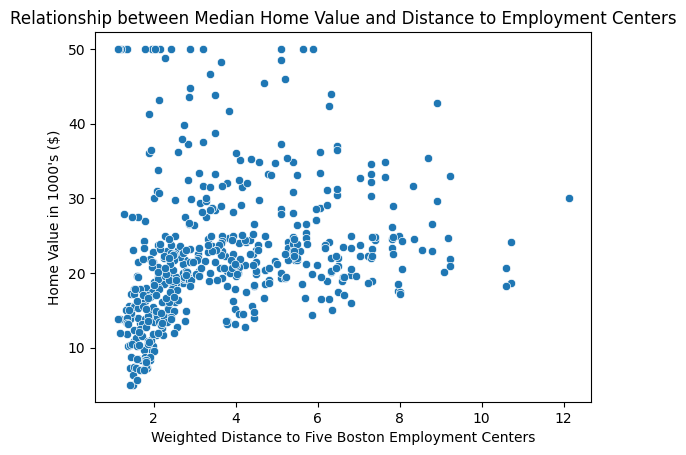

In [38]:
#Make the scatter plot to compare DIS and MEDV columns
sns.scatterplot(x=boston_df['DIS'], y=boston_df['MEDV'], data=boston_df)
pyplot.xlabel('Weighted Distance to Five Boston Employment Centers')
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Relationship between Median Home Value and Distance to Employment Centers')

In [39]:
#X is the input variable
X = boston_df['DIS']

#y is the target/dependent variable
y = boston_df['MEDV']

#add an intercept (beta_0) to the model
X = sm.add_constant(X)

#fit the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

#print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        00:08:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Relationship between Median Home Value and Distance to Employment Centers')

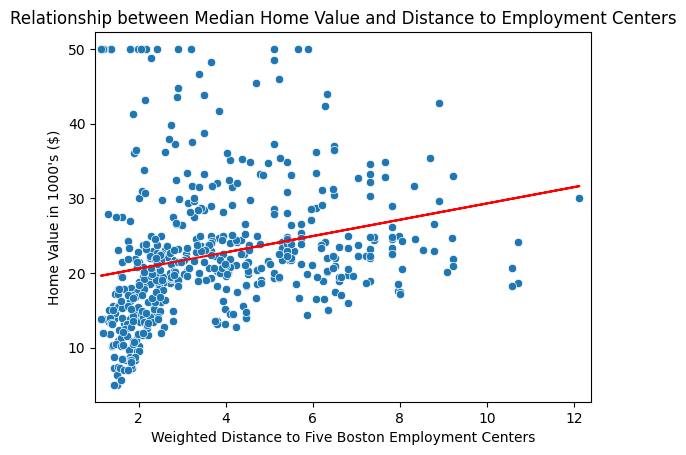

In [50]:
#Overlay the model prediction onto the scatter plot of DIS vs MEDV values
sns.scatterplot(x=boston_df['DIS'], y=boston_df['MEDV'], data=boston_df)
pyplot.plot(X, predictions, 'r-')
pyplot.xlabel('Weighted Distance to Five Boston Employment Centers')
pyplot.xlim(1,12.4)
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Relationship between Median Home Value and Distance to Employment Centers')

Text(0.5, 1.0, 'Relationship between Median Home Value and Distance to Employment Centers')

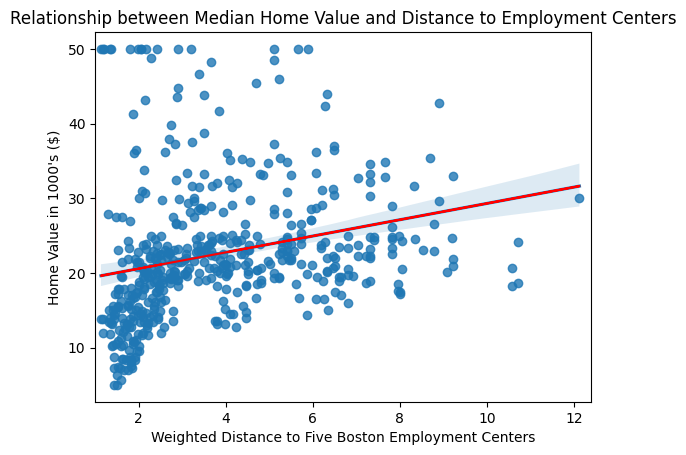

In [52]:
#compare with the regression line from Seaborn regplot function
sns.regplot(x=boston_df['DIS'], y=boston_df['MEDV'], data=boston_df)
pyplot.plot(X, predictions, 'r-')
pyplot.xlabel('Weighted Distance to Five Boston Employment Centers')
pyplot.xlim(1,12.4)
pyplot.ylabel("Home Value in 1000's ($)")
pyplot.title('Relationship between Median Home Value and Distance to Employment Centers')

**Statistical Test:** Simple Linear Regression

**Null Hypothesis:** There is not a significant correlation between the weighted distance to the employment centers and median home value.

**Statistical Result:** The probability of 1.21e-8 on the F-statistic suggests that we can reject the null hypothesis; there is a significant association between the distance and median home value. Also, the regression model predicts that the coefficient (slope) for the distance input variable is 1.092.

**Conclusion:** An increase of 1 mile weighted distance from the employment centers is expected to increase home value by $1092.

Text(0.5, 1.0, 'Histogram - Pupil to Teacher Ratio')

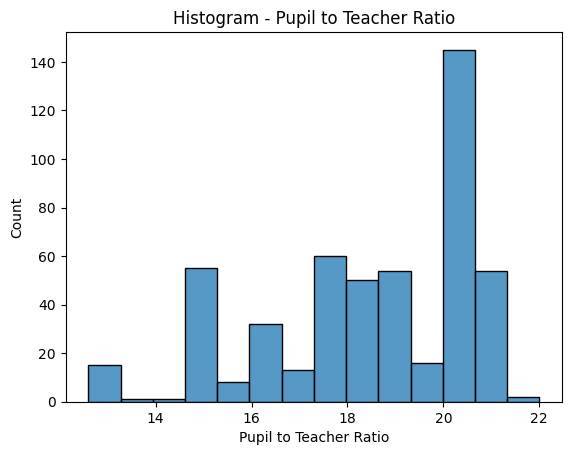

In [55]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(x=boston_df['PTRATIO'], data=boston_df)
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.title('Histogram - Pupil to Teacher Ratio')